In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pymc3 as pm
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
drug = (101,100,102,104,102,97,105,105,98,101,100,123,105,103,100,95,102,106,
        109,102,82,102,100,102,102,101,102,102,103,103,97,97,103,101,97,104,
        96,103,124,101,101,100,101,101,104,100,101)
placebo = (99,101,100,101,102,100,97,101,104,101,102,102,100,105,88,101,100,
           104,100,100,100,101,102,103,97,101,101,100,101,99,101,100,100,
           101,100,99,101,100,102,99,100,99)

In [4]:
y1 = np.array(drug)
y2 = np.array(placebo)
y = np.concatenate((y1, y2))

mu_m = np.mean( y )
mu_p = 0.000001 * 1/np.std(y)**2

sigma_low = np.std(y)/1000
sigma_high = np.std(y)*1000

In [5]:
with pm.Model() as model:
    group1_mean = pm.Normal('group1_mean', mu=mu_m, tau=mu_p, testval=y1.mean())
    group2_mean = pm.Normal('group2_mean', mu=mu_m, tau=mu_p, testval=y2.mean())
    group1_std = pm.Uniform('group1_std', lower=sigma_low, upper=sigma_high, testval=y1.std())
    group2_std = pm.Uniform('group2_std', lower=sigma_low, upper=sigma_high, testval=y2.std())
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1

    lam1 = group1_std**-2
    lam2 = group2_std**-2

    group1 = pm.T('drug', nu=nu, mu=group1_mean, lam=lam1, observed=y1)
    group2 = pm.T('placebo', nu=nu, mu=group2_mean, lam=lam2, observed=y2)

    diff_of_means = pm.Deterministic('difference of means', group1_mean - group2_mean)
    diff_of_stds = pm.Deterministic('difference of stds', group1_std - group2_std)
    effect_size = pm.Deterministic('effect size', diff_of_means / pm.sqrt((group1_std**2 + group2_std**2) / 2))
    step = pm.NUTS()
    trace = pm.sample(5000, step)

 [-----------------100%-----------------] 5000 of 5000 complete in 11.7 sec

/Users/vini/.virtualenvs/learn_data_science/lib/python2.7/site-packages/theano/scan_module/scan_perform_ext.py:133: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility
  from scan_perform.scan_perform import *


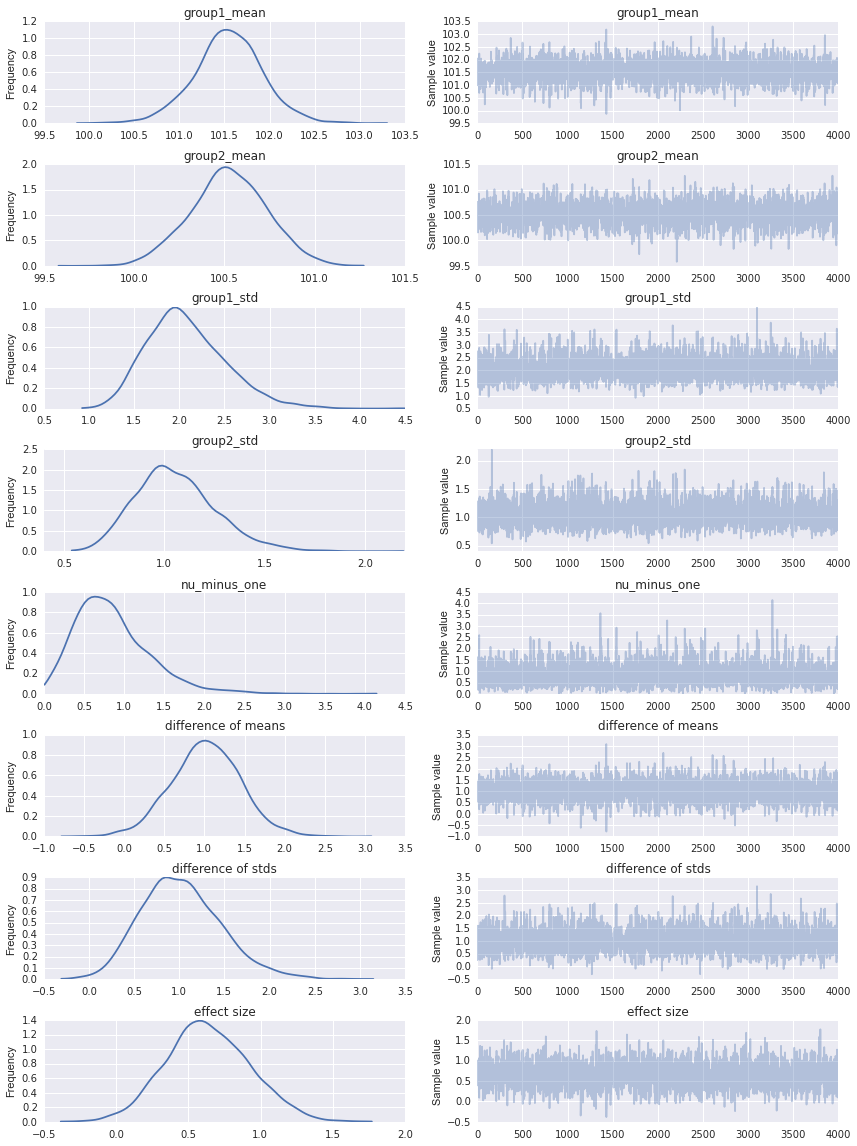

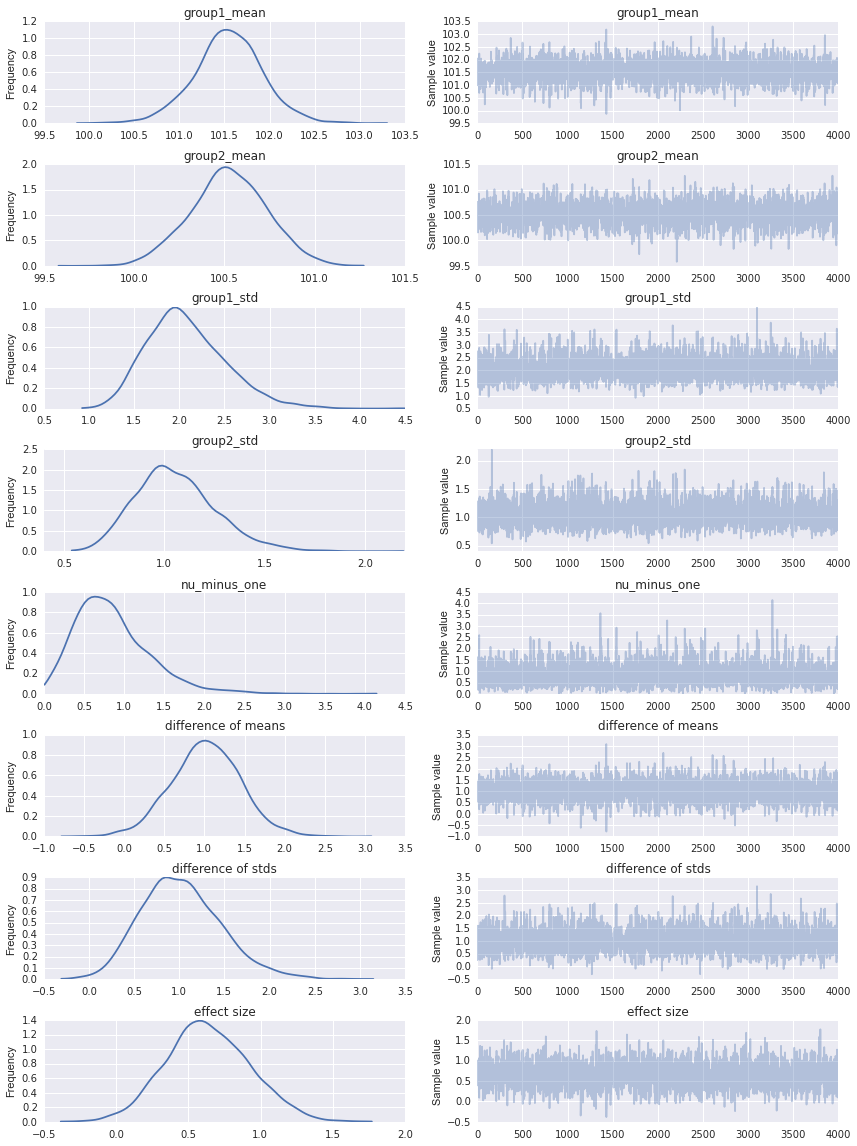

In [14]:
pm.traceplot(trace[1000:])

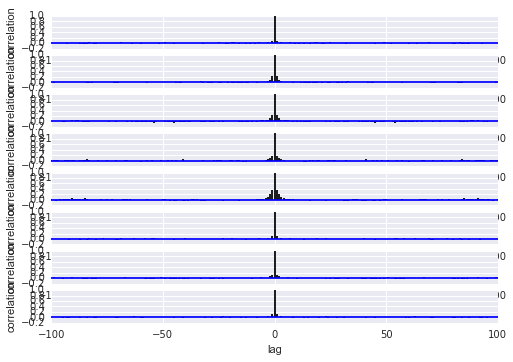

In [18]:
pm.plots.autocorrplot(trace[1000:])

In [11]:
pm.plots.summary(trace[1000:])


group1_mean:
 
  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  101.545          0.383            0.007            [100.827, 102.363]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  100.762        101.314        101.546        101.787        102.313


group2_mean:
 
  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  100.525          0.212            0.004            [100.102, 100.929]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  100.105        100.388        100.524        100.667        100.940


group1_std:
 
  Mean             SD               MC Error         95% HPD inte